In [21]:
ENV["PYTHONPATH"]="/home/gridsan/aligho/.local/lib/python3.8/site-packages/PyNormaliz-2.15-py3.8-linux-x86_64.egg";
using Crystalline, MPBUtils, SymmetryBases, JLD2, PyPlot, DelimitedFiles, PyCall, LinearAlgebra, Brillouin
shapely_point = pyimport("shapely.geometry").Point
shapely_polygon = pyimport("shapely.geometry.polygon").Polygon
cm = 1/2.54;
np = pyimport("numpy")

PyObject <module 'numpy' from '/home/gridsan/aligho/.local/lib/python3.9/site-packages/numpy/__init__.py'>

In [68]:
sg = 10
mode = "tm"
mult = 1
loaded_data_tolerance = load("sg$(sg)_tolerance.jld2")["well_separated_nodal_points"];
vals = filter( x-> !isempty(x), [filter(x-> x[1] == mult, val) for (key, val) in filter(x->x[1][1] == mode, loaded_data_tolerance)]);
vals = [val[1][3] for val in vals];


In [70]:
vals

50-element Vector{Float64}:
 -0.060199
 -0.036279000000000006
 -0.05907899999999999
 -0.089028
 -0.07941799999999999
 -0.040402999999999994
 -0.07799600000000001
 -0.08548800000000001
 -0.04042000000000001
 -0.06701499999999999
 -0.04184899999999997
 -0.084144
 -0.04618600000000003
  ⋮
 -0.07179500000000003
 -0.031504000000000004
 -0.06611400000000003
 -0.05010199999999998
 -0.045271000000000006
 -0.042101
 -0.062003999999999976
 -0.07668699999999998
 -0.102184
 -0.08801499999999998
 -0.08142899999999997
 -0.044217000000000006

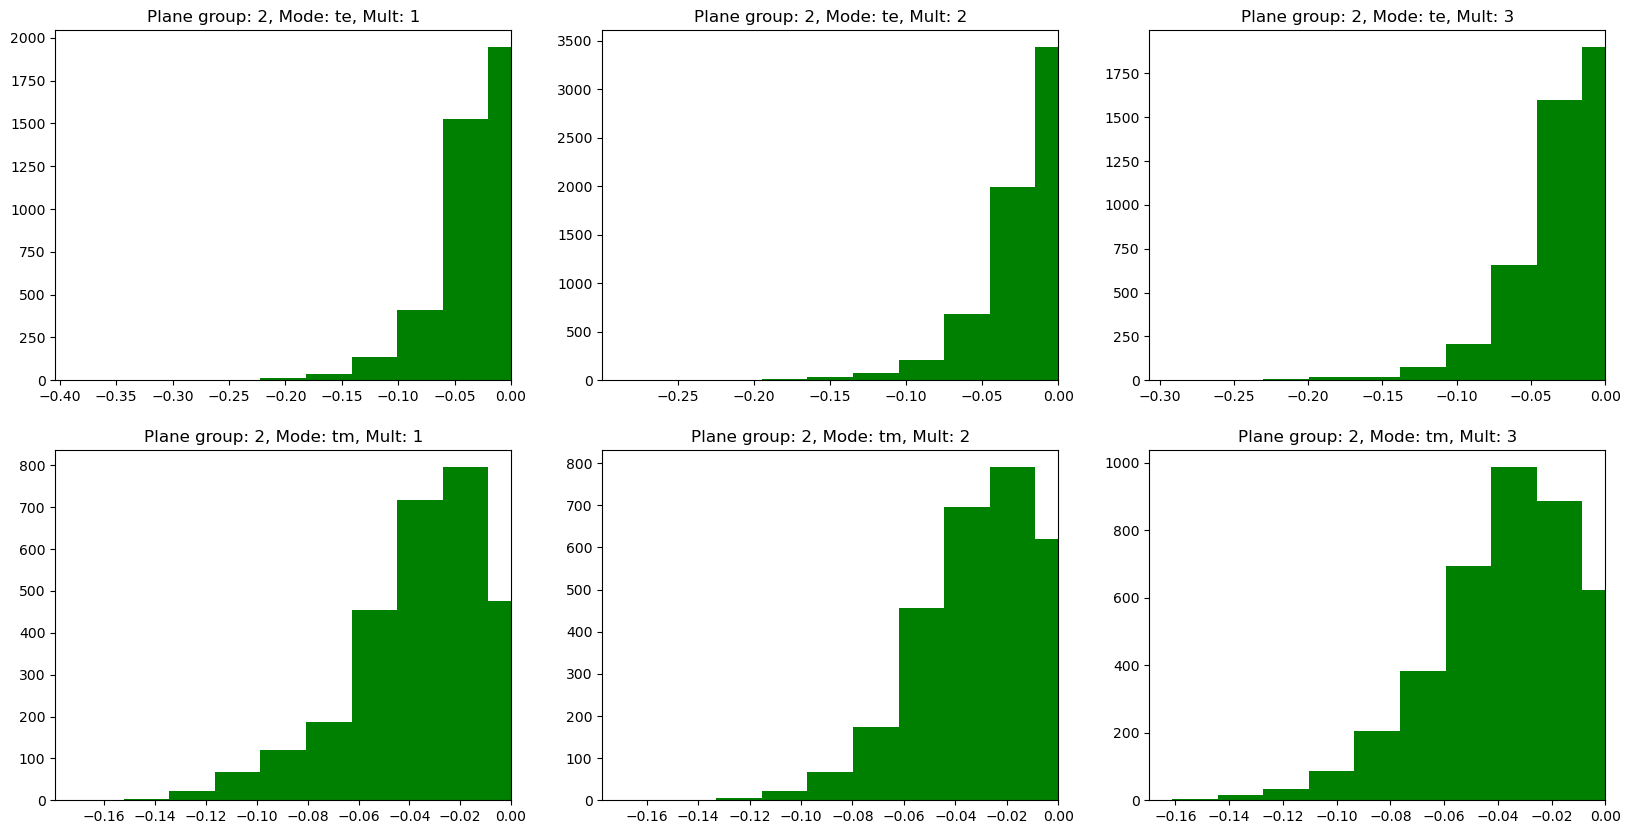

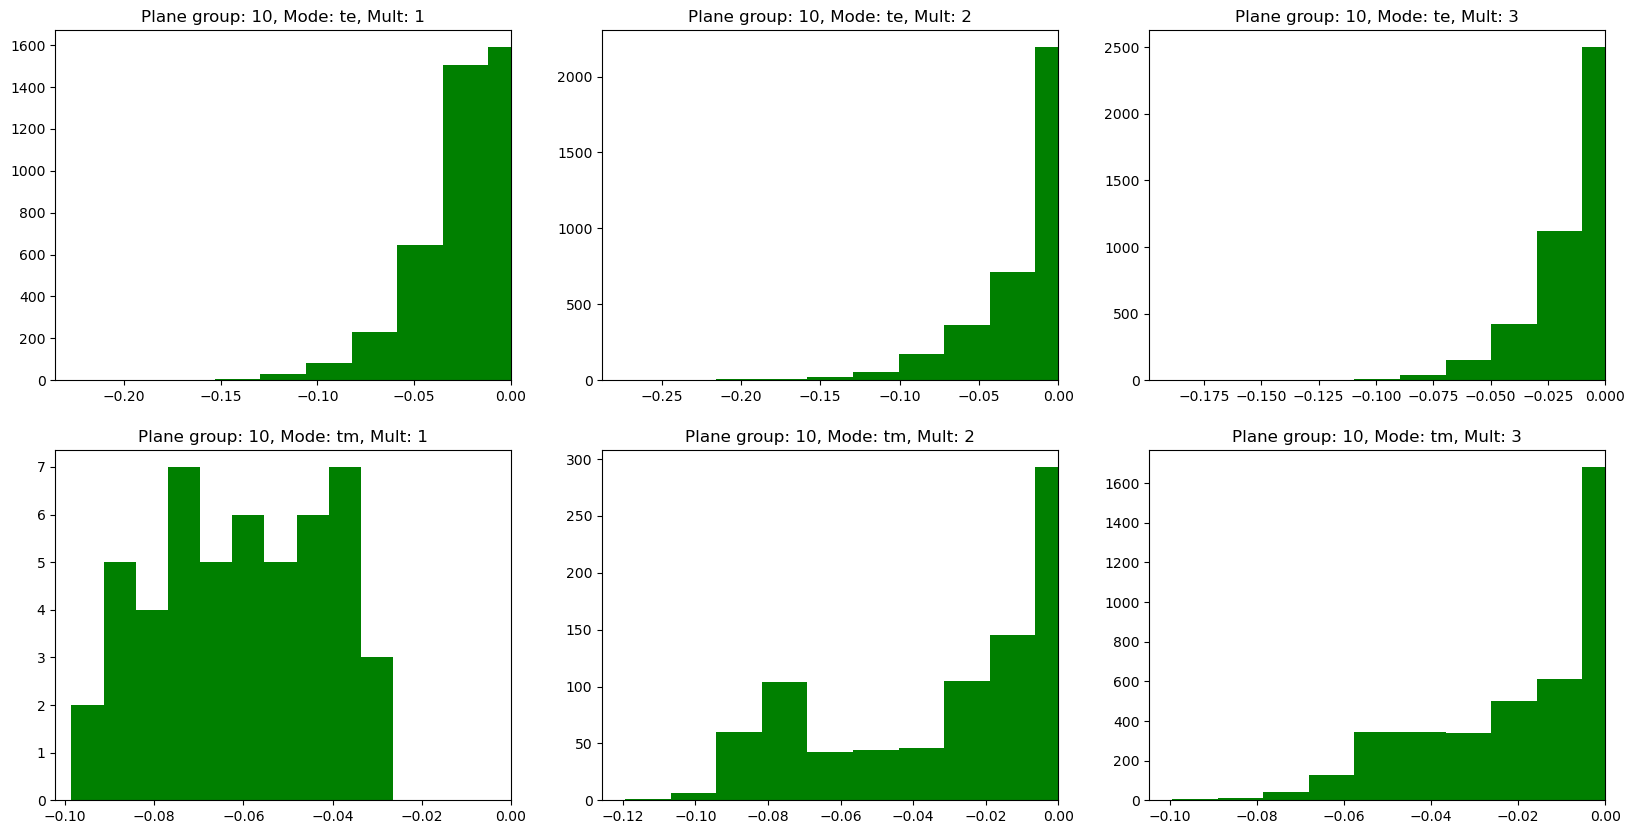

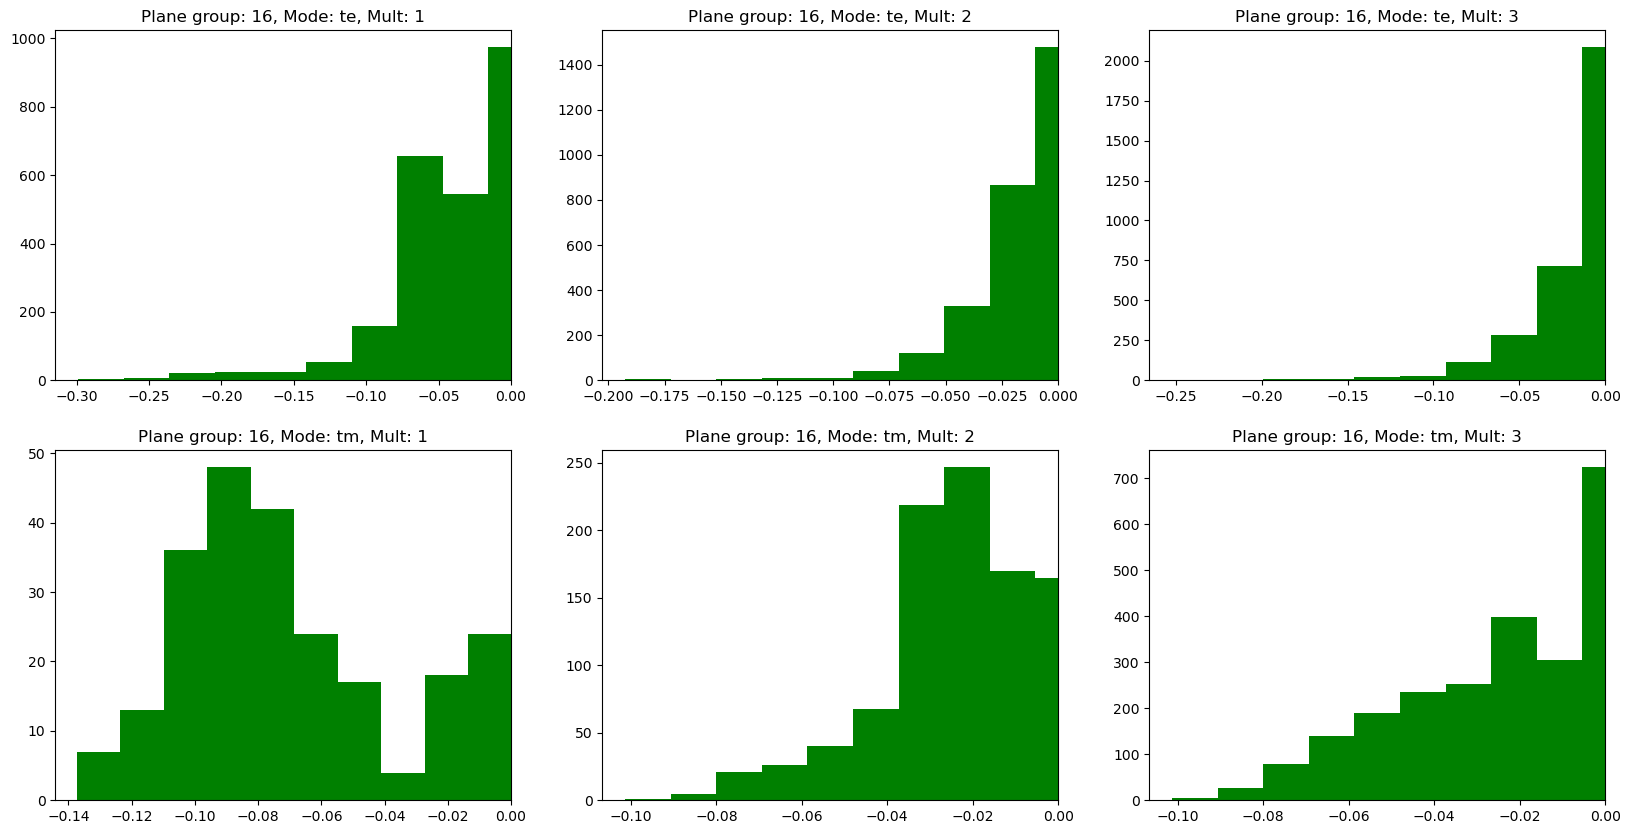

In [61]:
for sg in [2, 10, 16]
    loaded_data_tolerance = load("sg$(sg)_tolerance.jld2")["well_separated_nodal_points"];
    figure(figsize=(20, 10))
    for (i, mode) in enumerate(["te", "tm"])
        for mult in 1:3
            subplot(2, 3, mult + (i-1) * 3)
            vals = filter( x-> !isempty(x), [filter(x-> x[1] == mult, val) for (key, val) in filter(x->x[1][1] == mode, loaded_data_tolerance)]);
            vals = [val[1][3] for val in vals];
            x, y = np.histogram(vals)
            bar(y[2:end], x, width = first(diff(y)), color="green")
            xlim(minimum(y), 0)
            title("Plane group: $sg, Mode: $mode, Mult: $mult")
        end
    end
end